In [1]:
import pandas as pd

# Load dataset with correct delimiter (try `delimiter=","` or `delimiter=";"`)
file_path = "household_power_consumption.csv"
df = pd.read_csv(file_path, delimiter=";", low_memory=False)

# Print column names to check their actual names
print(df.columns)


Index(['index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3'], dtype='object')


In [4]:
import pandas as pd

# Load dataset properly
file_path = "household_power_consumption.csv"
df = pd.read_csv(file_path, sep=",", index_col=0, low_memory=False)

# Print column names to verify
print(df.columns)

# Display first few rows
print(df.head())



Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')
         Date     Time Global_active_power Global_reactive_power Voltage  \
index                                                                      
0      1/1/07  0:00:00                2.58                 0.136  241.97   
1      1/1/07  0:01:00               2.552                   0.1  241.75   
2      1/1/07  0:02:00                2.55                   0.1  241.64   
3      1/1/07  0:03:00                2.55                   0.1  241.71   
4      1/1/07  0:04:00               2.554                   0.1  241.98   

      Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
index                                                                 
0                 10.6              0              0             0.0  
1                 10.4              0              0         

In [7]:
# Ensure correct delimiter and read the dataset
df = pd.read_csv("household_power_consumption.csv", delimiter=",", low_memory=False)

# Combine 'Date' and 'Time' into a single 'Datetime' column
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S", errors="coerce")

# Drop the old 'Date' and 'Time' columns
df.drop(columns=["Date", "Time"], inplace=True)

# Check if conversion worked
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  260640 non-null  int64         
 1   Global_active_power    260640 non-null  object        
 2   Global_reactive_power  260640 non-null  object        
 3   Voltage                260640 non-null  object        
 4   Global_intensity       260640 non-null  object        
 5   Sub_metering_1         260640 non-null  object        
 6   Sub_metering_2         260640 non-null  object        
 7   Sub_metering_3         256869 non-null  float64       
 8   Datetime               156960 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 17.9+ MB
None
   index Global_active_power Global_reactive_power Voltage Global_intensity  \
0      0                2.58                 0.136  241.97      

In [9]:
num_cols = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity",
            "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

print(df.info())  # Check if types are corrected


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  260640 non-null  int64         
 1   Global_active_power    256869 non-null  float64       
 2   Global_reactive_power  256869 non-null  float64       
 3   Voltage                256869 non-null  float64       
 4   Global_intensity       256869 non-null  float64       
 5   Sub_metering_1         256869 non-null  float64       
 6   Sub_metering_2         256869 non-null  float64       
 7   Sub_metering_3         256869 non-null  float64       
 8   Datetime               156960 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 17.9 MB
None


In [10]:
df.fillna(df.median(), inplace=True)  # Replace NaN with median


In [11]:
df["Year"] = df["Datetime"].dt.year
df["Month"] = df["Datetime"].dt.month
df["Day"] = df["Datetime"].dt.day
df["Hour"] = df["Datetime"].dt.hour
df["Weekday"] = df["Datetime"].dt.weekday  # 0=Monday, 6=Sunday


In [12]:
df.drop(columns=["Datetime"], inplace=True)


In [13]:
X = df.drop(columns=["Global_active_power"])  # Features
y = df["Global_active_power"]  # Target variable


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}")


MAE: 0.02825456801137759, MSE: 0.0019771904807378425


In [19]:
print(df.columns)


Index(['index', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Year', 'Month', 'Day', 'Hour', 'Weekday'],
      dtype='object')


In [21]:
import pandas as pd

# Create the Datetime column
df["Datetime"] = pd.to_datetime(df[["Year", "Month", "Day", "Hour"]])


In [22]:
print(df[["Year", "Month", "Day", "Hour", "Datetime"]].head())
print(df.dtypes)


   Year  Month  Day  Hour            Datetime
0  2007      4   13    11 2007-04-13 11:00:00
1  2007      4   13    11 2007-04-13 11:00:00
2  2007      4   13    11 2007-04-13 11:00:00
3  2007      4   13    11 2007-04-13 11:00:00
4  2007      4   13    11 2007-04-13 11:00:00
index                             int64
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Year                              int32
Month                             int32
Day                               int32
Hour                              int32
Weekday                           int32
Datetime                 datetime64[ns]
dtype: object


In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ R² Score: {r2:.4f}")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📊 MAE: {mae:.4f}")

✅ R² Score: 0.9986
📉 RMSE: 0.0445
📊 MAE: 0.0283


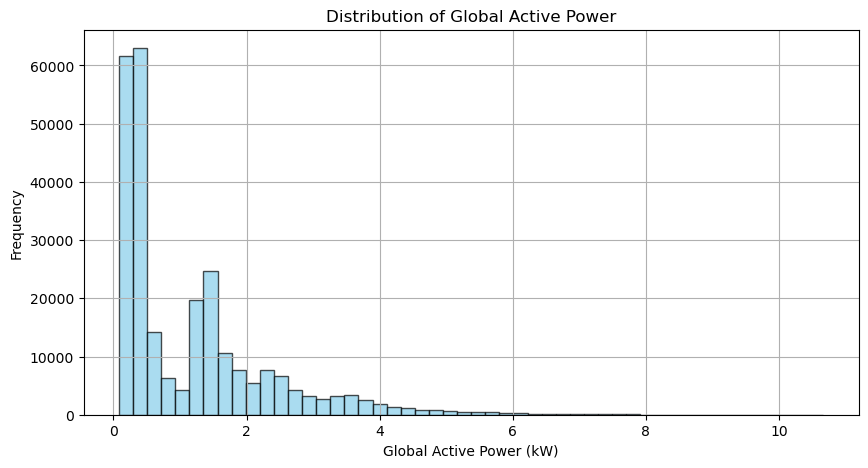

In [25]:
plt.figure(figsize=(10, 5))
plt.hist(df["Global_active_power"], bins=50, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Frequency")
plt.title("Distribution of Global Active Power")
plt.grid()
plt.show()


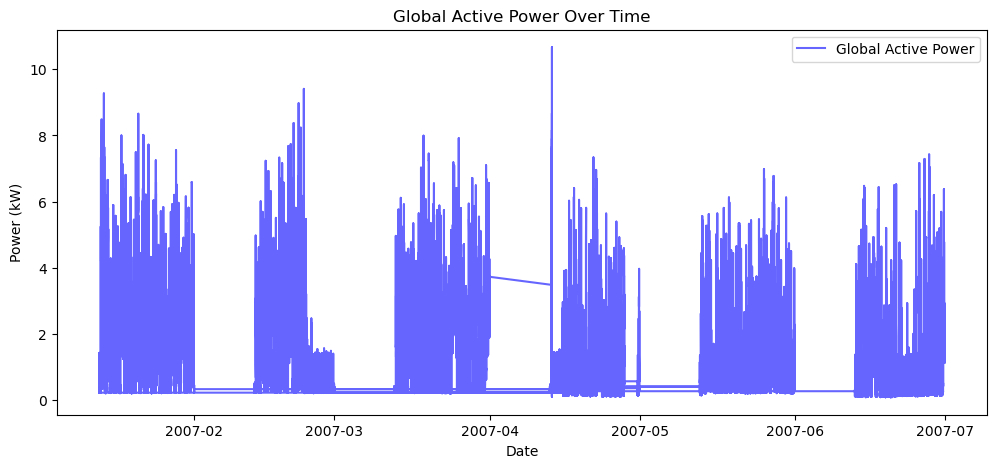

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df["Datetime"], df["Global_active_power"], label="Global Active Power", color="blue", alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.title("Global Active Power Over Time")
plt.legend()
plt.show()


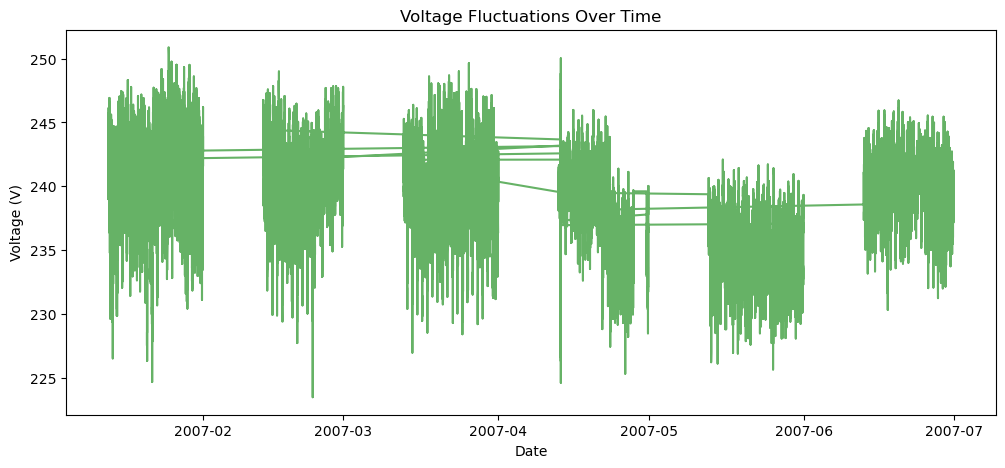

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(df["Datetime"], df["Voltage"], color="green", alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Voltage (V)")
plt.title("Voltage Fluctuations Over Time")
plt.show()


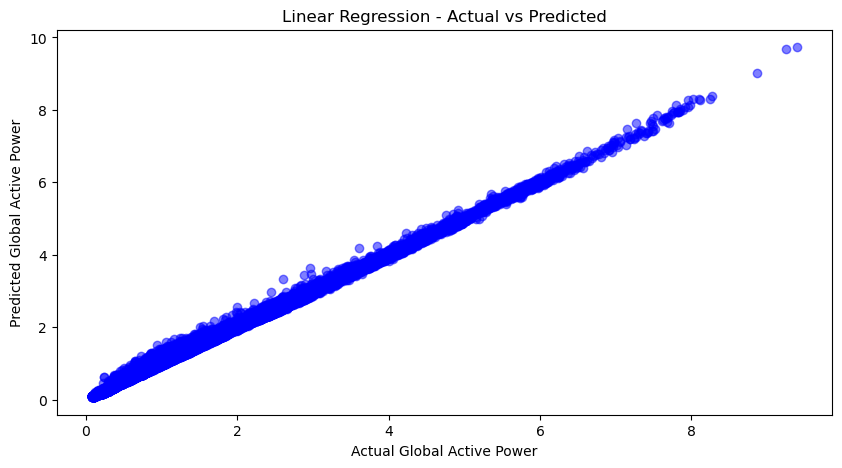

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Linear Regression - Actual vs Predicted")
plt.show()